In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [2]:
#Generators
train_data=keras.utils.image_dataset_from_directory(
        directory='catdogdataset/train',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)
validation_data=keras.utils.image_dataset_from_directory(
        directory='catdogdataset/test',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [3]:
#Create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))  
model.add(Dropout(0.1))

          
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

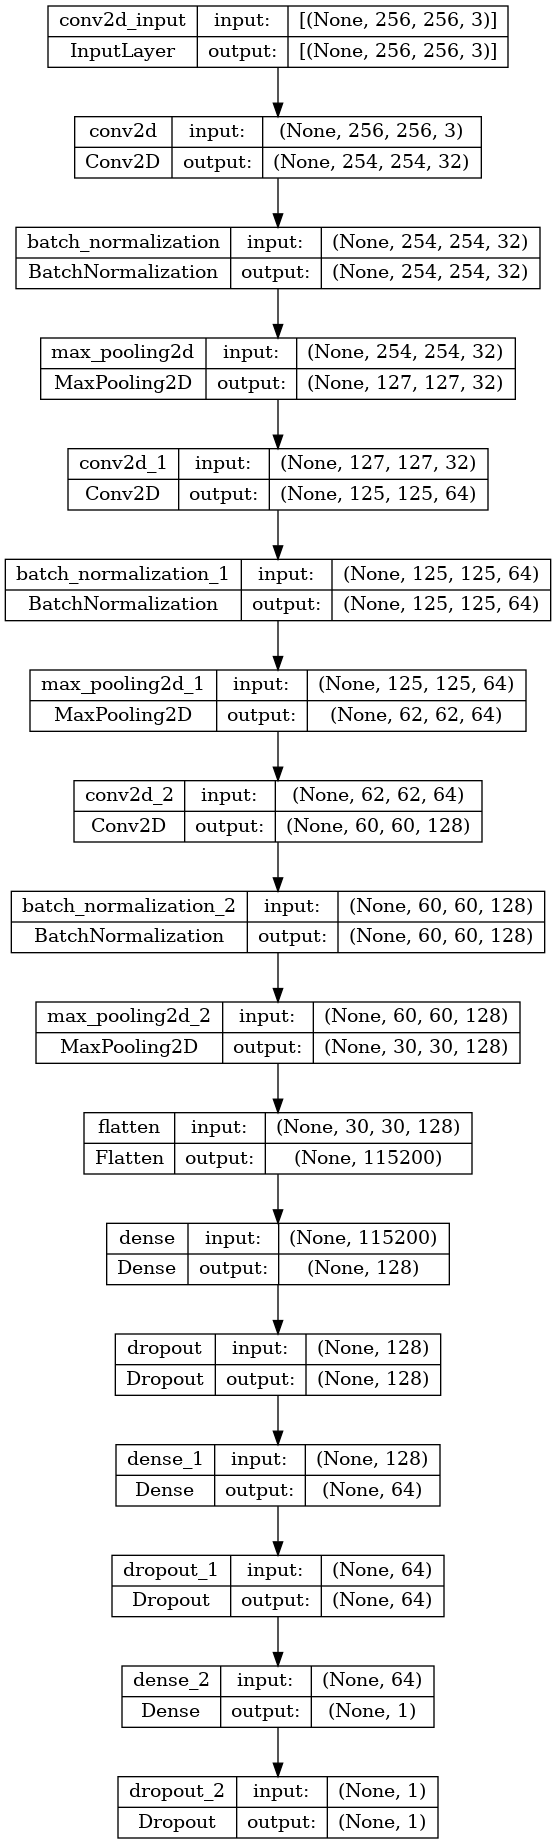

In [4]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
18/18 [==============================] - 19s 972ms/step - loss: 7.0169 - accuracy: 0.5081 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 17s 958ms/step - loss: 7.0459 - accuracy: 0.5386 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 17s 960ms/step - loss: 7.2075 - accuracy: 0.5260 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 19s 1s/step - loss: 7.6243 - accuracy: 0.5009 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 19s 1s/step - loss: 7.4651 - accuracy: 0.5099 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 17s 954ms/step - loss: 7.5930 - accuracy: 0.5027 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 18s 1s/step - loss: 7.5145 - accuracy: 0.5063 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 8/

1/1 [==============================] - 0s 71ms/step


array([[1.]], dtype=float32)

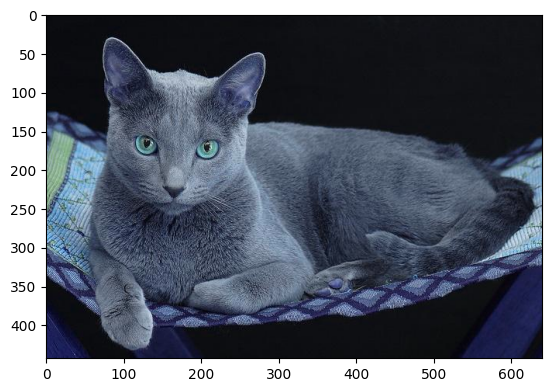

In [6]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread('catdogdataset/test/cats/cat_147.jpg')
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_img.shape
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)